In [1]:
# Summary of Findings

## The four most promising drug regimes had the least amount of variation in the data when 
## looking at summary statistics such as SEM, variance, and standard deviation. Addionally, 
## these drug regimens had the lowest tumor volume mean over the entire study period. 

## Based on the analysis of the four most promising regimens, Capomulin and Ramicane, offer the greatest
## promise in reucing tumor volume size. However, these should be compared to the placebo to see the relative 
## effect of the treatment to draw more significant conclusions.

## Capomulin regime on mouse s185 seemed to be succesful. The tumor volume shrunk over the course of the study 
## time period and the mouse did not die earler than 45 days, the conclusion of the study period.


In [2]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [3]:
# Combine the data into a single dataset

# merge on mouse ID
total_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
total_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen = total_data.groupby("Drug Regimen")

# calculate summary statistics of tumor volume for each drug regimen
tumor_volume = regimen["Tumor Volume (mm3)"]
tumor_volume_mean = tumor_volume.mean()
tumor_volume_median = tumor_volume.median()
tumor_volume_variance = tumor_volume.var()
tumor_volume_std = tumor_volume.std()
tumor_volume_sem = tumor_volume.sem()

# create summary data frame
regimen_summary_df = pd.DataFrame({"Tumor Volume Mean" : tumor_volume_mean,
                                "Tumor Volume Median": tumor_volume_median,
                                "Tumor Volume Variance" : tumor_volume_variance,
                                "Tumor Volume STD" : tumor_volume_std,
                                "Tumor Volume SEM" : tumor_volume_sem})

regimen_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

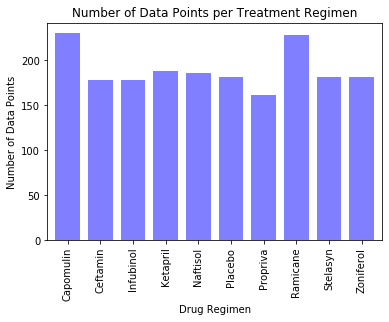

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count = regimen.count()
title = "Number of Data Points per Treatment Regimen"
ax = regimen_count["Mouse ID"].plot(kind='bar', color = 'b', alpha = 0.5, width=0.75, title = title)
ax.set_ylabel("Number of Data Points")

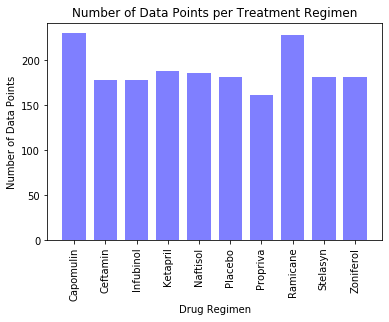

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y_axis = regimen_count["Mouse ID"]
x_axis = regimen_count.index
plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color="b", alpha = 0.5, width=0.75, align="center")
plt.show()

Text(0, 0.5, '')

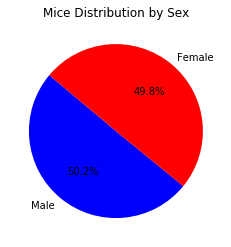

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_data = total_data.drop_duplicates("Mouse ID")

male_count = mouse_data["Sex"].value_counts()["Male"]
female_count = mouse_data["Sex"].value_counts()["Female"]

mouse_sex_data_df = pd.DataFrame({"Sex Count" : [male_count, female_count]})

labels = ["Male" , "Female"]
colors = ["blue", "red"]
title = "Mice Distribution by Sex"
ax = mouse_sex_data_df.plot(y = 'Sex Count', kind = "pie", labels = labels, title = title, legend = False, 
                            colors = colors, autopct="%1.1f%%", startangle=140)
ax.set_ylabel('')

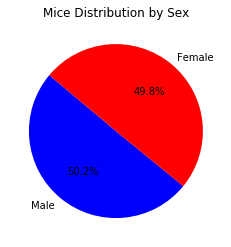

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex_data_df["Sex Count"], labels=labels, colors=colors,
                autopct="%1.1f%%", shadow=False, startangle=140)
plt.title(title)
plt.show()

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Capomulin, Ramicane, Infubinol, and Ceftamin

In [10]:
# Capomulin Final Volumes

capomulin_regimen = total_data[total_data["Drug Regimen"].isin(["Capomulin"])]
capomulin_sorted = capomulin_regimen.sort_values(by=['Timepoint'], ascending = False)
capomulin_group = capomulin_sorted.groupby('Mouse ID')
final_capomulin_volumes = capomulin_group['Tumor Volume (mm3)'].first()

# Capomulin IQR

quartiles_capomulin = final_capomulin_volumes.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_ramicane = upperq_capomulin - lowerq_capomulin

print('Capomulin')
print(f"Values below {lowerq_capomulin} could be outliers.")
print(f"Values above {upperq_capomulin} could be outliers.")

Capomulin
Values below 32.37735684 could be outliers.
Values above 40.1592203 could be outliers.


In [11]:
# Ramicane Final Volumes

ramicane_regimen = total_data[total_data["Drug Regimen"].isin(["Ramicane"])]
ramicane_sorted = ramicane_regimen.sort_values(by=['Timepoint'], ascending = False)
ramicane_group = ramicane_sorted.groupby('Mouse ID')
final_ramicane_volumes = ramicane_group['Tumor Volume (mm3)'].first()

# Ramicane IQR

quartiles_ramicane = final_ramicane_volumes.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane

print('Ramicane')
print(f"Values below {lowerq_ramicane} could be outliers.")
print(f"Values above {upperq_ramicane} could be outliers.")

Ramicane
Values below 31.56046955 could be outliers.
Values above 40.65900627 could be outliers.


In [12]:
# Infubinol Final Volumes

infubinol_regimen = total_data[total_data["Drug Regimen"].isin(["Infubinol"])]
infubinol_sorted = infubinol_regimen.sort_values(by=['Timepoint'], ascending = False)
infubinol_group = infubinol_sorted.groupby('Mouse ID')
final_infubinol_volumes = infubinol_group['Tumor Volume (mm3)'].first()

# Infubinol IQR

quartiles_infubinol = final_infubinol_volumes.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol

print('Infubinol')
print(f"Values below {lowerq_infubinol} could be outliers.")
print(f"Values above {upperq_infubinol} could be outliers.")

Infubinol
Values below 54.04860769 could be outliers.
Values above 65.52574285 could be outliers.


In [13]:
# Ceftamin Final Volumes

ceftamin_regimen = total_data[total_data["Drug Regimen"].isin(["Ceftamin"])]
ceftamin_sorted = ceftamin_regimen.sort_values(by=['Timepoint'], ascending = False)
ceftamin_group = ceftamin_sorted.groupby('Mouse ID')
final_ceftamin_volumes = ceftamin_group['Tumor Volume (mm3)'].first()

# Ceftamin IQR

quartiles_ceftamin = final_ceftamin_volumes.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin

print('Ceftamin')
print(f"Values below {lowerq_ceftamin} could be outliers.")
print(f"Values above {upperq_ceftamin} could be outliers.")

Ceftamin
Values below 48.72207785 could be outliers.
Values above 64.29983003 could be outliers.


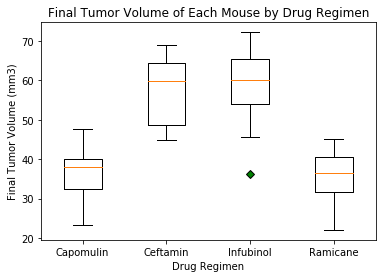

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

labels = ("Capomulin", "Ceftamin", "Infubinol", "Ramicane")
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot([final_capomulin_volumes, 
             final_ceftamin_volumes, 
             final_infubinol_volumes,
             final_ramicane_volumes], 
            labels = labels, flierprops=green_diamond)
plt.title("Final Tumor Volume of Each Mouse by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

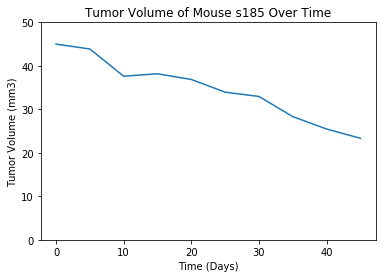

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = total_data.loc[total_data["Drug Regimen"] == 'Capomulin']
s185 = capomulin_df.loc[capomulin_df["Mouse ID"] == 's185']
time = s185["Timepoint"]
tumor_vol = s185["Tumor Volume (mm3)"]

plt.title("Tumor Volume of Mouse s185 Over Time")
plt.plot(time, tumor_vol)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,50)
plt.show()

The Pearson coefficient is 0.93
tumor volume = 0.88 * weight + 23.08


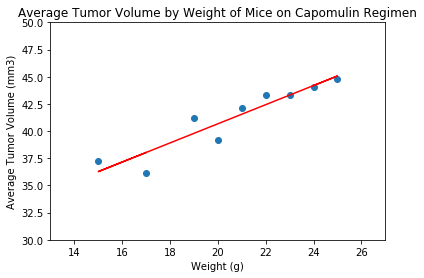

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_weight = capomulin_regimen['Weight (g)'].unique()
capomulin_weight_group = capomulin_regimen.groupby('Weight (g)')
capomulin_avg_volume = capomulin_weight_group['Tumor Volume (mm3)'].mean()

plt.scatter(capomulin_weight, capomulin_avg_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight of Mice on Capomulin Regimen')
plt.ylim(30, 50)
plt.xlim(13, 27)

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_weight, capomulin_avg_volume)
tumor_volume = slope * capomulin_weight + intercept

coefficient = round(st.pearsonr(capomulin_weight, capomulin_avg_volume)[0],2)
print(f'The Pearson coefficient is {coefficient}')
print("tumor volume = " + str(round(slope,2)) + " * " + "weight + " + str(round(intercept, 2)))

plt.plot(capomulin_weight, tumor_volume, '-', color = 'r')
plt.show()